In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
actions = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself']
actions = np.array(actions)

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
label_map

{'cold': 0,
 'dizziness': 1,
 'allergic_reaction': 2,
 'snot': 3,
 'unwell': 4,
 'hello': 5,
 'myself': 6}

In [5]:
sequences, labels = [], []
for action in actions:
    for sequence in range(200):
        window = []
        for frame_num in range(90):
            res = np.load(os.path.join('keypoints', action, str(sequence+1), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [6]:
np.array(sequences).shape

(1400, 90, 1662)

In [7]:
np.array(labels).shape

(1400,)

In [8]:
X = np.array(sequences)

In [9]:
X.shape

(1400, 90, 1662)

In [10]:
y = to_categorical(labels).astype(int)

In [11]:
y.shape

(1400, 7)

In [12]:
y[0]

array([1, 0, 0, 0, 0, 0, 0])

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
X_scale = scaler.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2)

In [16]:
X_test.shape

(280, 90, 1662)

In [17]:
y_test.shape

(280, 7)

In [18]:
model = tf.keras.models.load_model('models/baseline_7class_9500.h5')

In [19]:
model.evaluate(X_test, y_test)

2023-01-09 15:54:22.036590: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 1s 16ms/step - loss: 0.1032 - categorical_accuracy: 0.9643


[0.10320667177438736, 0.9642857313156128]

In [20]:
y0_pred = model.predict(tf.expand_dims(X_test[1], axis=0))

1/1 [==============================] - 0s 95ms/step


In [21]:
tf.expand_dims(X_test[1], axis=0).shape

TensorShape([1, 90, 1662])

In [22]:
y0_pred[0]

array([9.6769363e-01, 3.1260762e-02, 6.9906717e-05, 1.1319668e-04,
       8.5672369e-04, 5.7386646e-06, 2.0378469e-08], dtype=float32)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_preds = model.predict(X_test)

9/9 [==============================] - 0s 17ms/step


In [25]:
y_preds

array([[6.4951513e-05, 1.8746119e-04, 9.9937743e-01, ..., 1.8792781e-06,
        1.0168408e-06, 1.1180824e-04],
       [9.6769363e-01, 3.1260747e-02, 6.9906448e-05, ..., 8.5672416e-04,
        5.7387088e-06, 2.0378469e-08],
       [8.8865149e-01, 9.0776511e-02, 1.1365894e-03, ..., 1.8941736e-02,
        2.8443610e-05, 8.4419580e-06],
       ...,
       [9.9997115e-01, 5.4139027e-06, 2.0117445e-09, ..., 5.2156233e-06,
        6.7671300e-07, 6.7648678e-08],
       [2.4947972e-06, 9.8207049e-05, 1.8742858e-05, ..., 1.0236790e-06,
        1.0081918e-08, 1.4815389e-01],
       [1.1777872e-02, 9.8627567e-01, 6.7502428e-06, ..., 1.3963832e-03,
        4.2713145e-04, 3.2442748e-09]], dtype=float32)

In [26]:
cm = confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1))

In [27]:
cm_df = pd.DataFrame(cm,
                     index = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself'], 
                     columns = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself'])

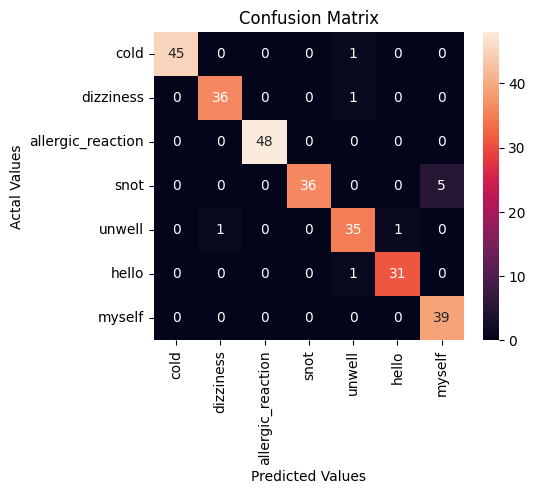

In [28]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [29]:
X[0].shape

(90, 1662)

In [30]:
!pwd

/Users/alice/Documents/Plug/InternEver/SignLanguage/Notebooks/new_code


In [31]:
!ls

6                       augment_flip.py         preprocessing.ipynb
7_class_try_model.ipynb class_names.txt         test
8_class.ipynb           collect_data.py         try_model.ipynb
8_class_try_model.ipynb keypoints               videos
Untitled.ipynb          models


In [32]:
X_test[1].shape

(90, 1662)

In [70]:
test_new_file = []
for frame_num in range(90):
    res = np.load('keypoints/cold/4/{}.npy'.format(frame_num))
    test_new_file.append(res)

In [71]:
test_new_file = np.array(test_new_file)

In [72]:
test_new_file = scaler.fit_transform(test_new_file.reshape(test_new_file.shape[0], -1)).reshape(test_new_file.shape)

In [73]:
new_pred = model.predict(tf.expand_dims(test_new_file, axis=0))

1/1 [==============================] - 0s 22ms/step


In [74]:
new_pred.shape

(1, 7)

In [75]:
result = actions[np.argmax(new_pred)]
result

'cold'